In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xl = pd.read_excel('blank-check-data.xlsx', sheet_name=None, index_col='CODE')
df_miniseries = xl['MINISERIES']
df_films = xl['FILMS']
df_films.head()

,NAME,MINISERIES,PATREON,NONDIRECTOR,RELEASEDATE,BUDGET,REVENUE,RUNTIME,MINISERIESNAME
CODE,,,,,,,,,
1893,Star Wars: Episode I - The Phantom Menace,STARWARS,False,NaN,1999-05-19,115000000,924317558,136,Star Wars
205587,The Judge,JUDGE,False,NaN,2014-10-08,50000000,83719388,141,Judging the Judge
1894,Star Wars: Episode II - Attack of the Clones,STARWARS,False,NaN,2002-05-15,120000000,649398328,142,Star Wars
22059,The Fantastic Four,FANTASTICFOUR,False,NaN,1994-01-01,1500000,0,90,The Podcastic Two
9738,Fantastic Four,FANTASTICFOUR,False,NaN,2005-06-29,100000000,330579719,106,The Podcastic Two


In [3]:
import glob
import os
corpus_path = 'C:/Users/Rik/Documents/corpus/'
scripts_path = 'imsdb_raw_nov_2015'

filmFiles = {}

for folder in os.scandir(corpus_path + scripts_path):
    if folder.is_dir():
        for file in os.scandir(folder.path):
            if(file.name.endswith('.txt')):
                if not file.name in filmFiles:
                    filmFiles[file.name] = { 'path': file.path }

In [4]:
def cleanFileName(text):
    return text.replace('.txt', '').replace('the', '').replace(':', '')

def cleanTitle(text):
    return text.lower().replace(' ', '').replace('the', '').replace(':', '')

matchedFilms = {}
for filmName, filmInfo in filmFiles.items():
    df_found = df_films[df_films.apply(lambda f: cleanTitle(f['NAME']) == cleanFileName(filmName), axis=1)]
    if(len(df_found)):
        matchedFilms[df_found.index.values.astype(int)[0]] = {
            'FILEPATH': filmInfo['path'],
            'NAME': df_found['NAME'].iloc[0],
            'MINISERIES': df_found['MINISERIES'].iloc[0]
        }

In [5]:
for key, filmInfo in matchedFilms.items():
    print(filmInfo['NAME'], filmInfo['MINISERIES'], filmInfo['FILEPATH'])

The Abyss CAMERON C:/Users/Rik/Documents/corpus/imsdb_raw_nov_2015\Action\abyssthe.txt
Aliens CAMERON C:/Users/Rik/Documents/corpus/imsdb_raw_nov_2015\Action\aliens.txt
Avatar CAMERON C:/Users/Rik/Documents/corpus/imsdb_raw_nov_2015\Action\avatar.txt
The Avengers MCU C:/Users/Rik/Documents/corpus/imsdb_raw_nov_2015\Action\avengersthe.txt
Batman BURTON C:/Users/Rik/Documents/corpus/imsdb_raw_nov_2015\Action\batman.txt
The Dark Knight Rises NOLAN C:/Users/Rik/Documents/corpus/imsdb_raw_nov_2015\Action\darkknightrisesthe.txt
The Fantastic Four FANTASTICFOUR C:/Users/Rik/Documents/corpus/imsdb_raw_nov_2015\Action\fantasticfour.txt
Heat MANN C:/Users/Rik/Documents/corpus/imsdb_raw_nov_2015\Action\heat.txt
Inception NOLAN C:/Users/Rik/Documents/corpus/imsdb_raw_nov_2015\Action\inception.txt
Lost in Space LOSTINSPACE C:/Users/Rik/Documents/corpus/imsdb_raw_nov_2015\Action\lostinspace.txt
The Matrix Reloaded WACHOWSKI C:/Users/Rik/Documents/corpus/imsdb_raw_nov_2015\Action\matrixreloadedthe.tx

In [12]:
df_matched_films = pd.DataFrame.from_dict(matchedFilms, orient='index')

df_director_miniseries = df_miniseries[df_miniseries['DIRECTOR']]

df_director_films = df_matched_films[df_matched_films['MINISERIES'].isin(df_director_miniseries.index.values)]
df_director_films.head()

,FILEPATH,NAME,MINISERIES
74,C:/Users/Rik/Documents/corpus/imsdb_raw_nov_20...,War of the Worlds,SPIELBERG
77,C:/Users/Rik/Documents/corpus/imsdb_raw_nov_20...,Memento,NOLAN
82,C:/Users/Rik/Documents/corpus/imsdb_raw_nov_20...,Miami Vice,MANN
162,C:/Users/Rik/Documents/corpus/imsdb_raw_nov_20...,Edward Scissorhands,BURTON
180,C:/Users/Rik/Documents/corpus/imsdb_raw_nov_20...,Minority Report,SPIELBERG


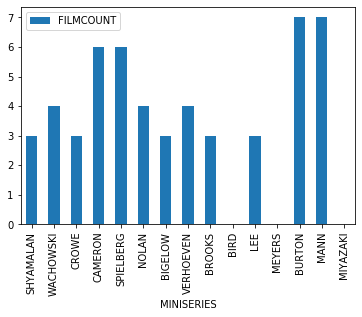

In [20]:
miniseries_count = [{'MINISERIES': code, 'FILMCOUNT': len(df_director_films[df_director_films['MINISERIES'] == code])} for code in df_director_miniseries.index.values]
df_miniseries_count = pd.DataFrame(miniseries_count)
df_miniseries_count.head()
df_miniseries_count.plot(kind='bar', y='FILMCOUNT', x='MINISERIES')
plt.show()

In [21]:
def removeTopHtml(text):
    topHtml = "<b><!--\n\n</b>if (window!= top)\n\ntop.location.href=location.href\n\n<b>// -->\n\n</b>"
    return text.replace(topHtml, '')

def removeNewLines(text):
    return text.replace('\n', ' ')

def removeTabs(text):
    return text.replace('\t', ' ')

def cleanText(text):
    return removeTabs(removeNewLines(removeTopHtml(text)))

def getScriptText(filename):
    with open(filename, 'r') as infile:
        return cleanText(infile.read())

miniseriesScripts = []
for miniseries, group_films in df_director_films.groupby(['MINISERIES']):
    currentScripts = ""
    for index, film in group_films.iterrows():
        currentScripts += " " + getScriptText(film['FILEPATH'])
    miniseriesScripts.append({
        'NAME': miniseries,
        'SCRIPTS': currentScripts
    })
df_miniseries_scripts = pd.DataFrame(miniseriesScripts)
df_miniseries_scripts.head()

,NAME,SCRIPTS
0,BIGELOW,S T R A N G E D A Y S by James Cam...
1,BROOKS,SPANGLISH ...
2,BURTON,Edward Sissorhands OLD KIM Snuggle in...
3,CAMERON,""" T E R M I N A T O R ""..."
4,CROWE,ALMOST FAMOUS by Cameron Crowe's <b><!-- <...
